In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [26]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
dates = engine.execute("SELECT date FROM measurement ORDER BY date DESC")
for record in dates:
    print(record)

('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-22',)
('2017-08-22',)
('2017-08-22',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-20',)
('2017-08-20',)
('2017-08-20',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-12',)
('2017-08-12',)
('2017-08-12',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-09',)
('2017-08-09',)
('2017-08-09',)
('2017-08-08',)
('2017-08-08',)
('2017-08-08',)
('2017-0

('2016-10-07',)
('2016-10-07',)
('2016-10-07',)
('2016-10-06',)
('2016-10-06',)
('2016-10-06',)
('2016-10-06',)
('2016-10-06',)
('2016-10-06',)
('2016-10-06',)
('2016-10-05',)
('2016-10-05',)
('2016-10-05',)
('2016-10-05',)
('2016-10-05',)
('2016-10-05',)
('2016-10-05',)
('2016-10-04',)
('2016-10-04',)
('2016-10-04',)
('2016-10-04',)
('2016-10-04',)
('2016-10-04',)
('2016-10-04',)
('2016-10-03',)
('2016-10-03',)
('2016-10-03',)
('2016-10-03',)
('2016-10-03',)
('2016-10-03',)
('2016-10-03',)
('2016-10-02',)
('2016-10-02',)
('2016-10-02',)
('2016-10-02',)
('2016-10-02',)
('2016-10-02',)
('2016-10-01',)
('2016-10-01',)
('2016-10-01',)
('2016-10-01',)
('2016-10-01',)
('2016-10-01',)
('2016-09-30',)
('2016-09-30',)
('2016-09-30',)
('2016-09-30',)
('2016-09-30',)
('2016-09-30',)
('2016-09-30',)
('2016-09-29',)
('2016-09-29',)
('2016-09-29',)
('2016-09-29',)
('2016-09-29',)
('2016-09-29',)
('2016-09-29',)
('2016-09-28',)
('2016-09-28',)
('2016-09-28',)
('2016-09-28',)
('2016-09-28',)
('2016-0

('2015-12-21',)
('2015-12-21',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-12-15',)
('2015-12-15',)
('2015-12-15',)
('2015-12-15',)
('2015-12-15',)
('2015-12-15',)
('2015-12-14',)
('2015-12-14',)
('2015-12-14',)
('2015-12-14',)
('2015-12-14',)
('2015-12-13',)
('2015-12-13',)
('2015-12-13',)
('2015-12-13',)
('2015-12-13',)
('2015-12-13',)
('2015-12-12',)
('2015-12-12',)
('2015-12-12',)
('2015-12-12',)
('2015-12-12',)
('2015-12-12',)
('2015-12-11',)
('2015-12-11',)
('2015-12-11',)
('2015-12-11',)
('2015-12-11',)
('2015-1

('2015-02-20',)
('2015-02-20',)
('2015-02-20',)
('2015-02-20',)
('2015-02-20',)
('2015-02-20',)
('2015-02-20',)
('2015-02-19',)
('2015-02-19',)
('2015-02-19',)
('2015-02-19',)
('2015-02-19',)
('2015-02-19',)
('2015-02-19',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-18',)
('2015-02-17',)
('2015-02-17',)
('2015-02-17',)
('2015-02-17',)
('2015-02-17',)
('2015-02-17',)
('2015-02-17',)
('2015-02-16',)
('2015-02-16',)
('2015-02-16',)
('2015-02-16',)
('2015-02-16',)
('2015-02-15',)
('2015-02-15',)
('2015-02-15',)
('2015-02-15',)
('2015-02-15',)
('2015-02-14',)
('2015-02-14',)
('2015-02-14',)
('2015-02-14',)
('2015-02-14',)
('2015-02-13',)
('2015-02-13',)
('2015-02-13',)
('2015-02-13',)
('2015-02-13',)
('2015-02-13',)
('2015-02-13',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-12',)
('2015-02-11',)
('2015-02-11',)
('2015-02-11',)
('2015-0

('2014-05-11',)
('2014-05-11',)
('2014-05-11',)
('2014-05-11',)
('2014-05-11',)
('2014-05-11',)
('2014-05-10',)
('2014-05-10',)
('2014-05-10',)
('2014-05-10',)
('2014-05-10',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-09',)
('2014-05-08',)
('2014-05-08',)
('2014-05-08',)
('2014-05-08',)
('2014-05-08',)
('2014-05-08',)
('2014-05-08',)
('2014-05-07',)
('2014-05-07',)
('2014-05-07',)
('2014-05-07',)
('2014-05-07',)
('2014-05-07',)
('2014-05-07',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-06',)
('2014-05-05',)
('2014-05-05',)
('2014-05-05',)
('2014-05-05',)
('2014-05-05',)
('2014-05-05',)
('2014-05-05',)
('2014-05-04',)
('2014-05-04',)
('2014-05-04',)
('2014-05-04',)
('2014-05-04',)
('2014-05-04',)
('2014-05-04',)
('2014-05-03',)
('2014-05-03',)
('2014-05-03',)
('2014-05-03',)
('2014-05-03',)
('2014-05-03',)
('2014-05-03',)
('2014-0

('2013-08-09',)
('2013-08-09',)
('2013-08-09',)
('2013-08-09',)
('2013-08-09',)
('2013-08-09',)
('2013-08-09',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-08',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-07',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-06',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-05',)
('2013-08-04',)
('2013-08-04',)
('2013-08-04',)
('2013-08-04',)
('2013-08-04',)
('2013-08-04',)
('2013-08-03',)
('2013-08-03',)
('2013-08-03',)
('2013-08-03',)
('2013-08-03',)
('2013-08-03',)
('2013-08-02',)
('2013-08-02',)
('2013-08-02',)
('2013-08-02',)
('2013-08-02',)
('2013-08-02',)
('2013-08-02',)
('2013-08-01',)
('2013-08-01',)
('2013-08-01',)
('2013-08-01',)
('2013-0

('2012-11-11',)
('2012-11-10',)
('2012-11-10',)
('2012-11-10',)
('2012-11-10',)
('2012-11-10',)
('2012-11-10',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-09',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-08',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-07',)
('2012-11-06',)
('2012-11-06',)
('2012-11-06',)
('2012-11-06',)
('2012-11-06',)
('2012-11-06',)
('2012-11-06',)
('2012-11-05',)
('2012-11-05',)
('2012-11-05',)
('2012-11-05',)
('2012-11-05',)
('2012-11-05',)
('2012-11-05',)
('2012-11-04',)
('2012-11-04',)
('2012-11-04',)
('2012-11-04',)
('2012-11-04',)
('2012-11-04',)
('2012-11-04',)
('2012-11-03',)
('2012-11-03',)
('2012-11-03',)
('2012-11-03',)
('2012-11-03',)
('2012-11-03',)
('2012-11-03',)
('2012-11-02',)
('2012-11-02',)
('2012-1

('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-02',)
('2012-04-01',)
('2012-04-01',)
('2012-04-01',)
('2012-04-01',)
('2012-04-01',)
('2012-04-01',)
('2012-04-01',)
('2012-03-31',)
('2012-03-31',)
('2012-03-31',)
('2012-03-31',)
('2012-03-31',)
('2012-03-31',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-30',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-29',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-28',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-27',)
('2012-03-26',)
('2012-03-26',)
('2012-03-26',)
('2012-03-26',)
('2012-03-26',)
('2012-03-26',)
('2012-03-26',)
('2012-03-25',)
('2012-03-25',)
('2012-0

('2011-07-18',)
('2011-07-17',)
('2011-07-17',)
('2011-07-17',)
('2011-07-17',)
('2011-07-17',)
('2011-07-17',)
('2011-07-16',)
('2011-07-16',)
('2011-07-16',)
('2011-07-16',)
('2011-07-16',)
('2011-07-16',)
('2011-07-16',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-15',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-14',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-13',)
('2011-07-12',)
('2011-07-12',)
('2011-07-12',)
('2011-07-12',)
('2011-07-12',)
('2011-07-12',)
('2011-07-12',)
('2011-07-11',)
('2011-07-11',)
('2011-07-11',)
('2011-07-11',)
('2011-07-11',)
('2011-07-11',)
('2011-07-11',)
('2011-07-10',)
('2011-07-10',)
('2011-07-10',)
('2011-07-10',)
('2011-07-10',)
('2011-07-10',)
('2011-07-10',)
('2011-07-09',)
('2011-07-09',)
('2011-07-09',)
('2011-0

('2011-02-10',)
('2011-02-10',)
('2011-02-10',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-09',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-08',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-07',)
('2011-02-06',)
('2011-02-06',)
('2011-02-06',)
('2011-02-06',)
('2011-02-06',)
('2011-02-06',)
('2011-02-05',)
('2011-02-05',)
('2011-02-05',)
('2011-02-05',)
('2011-02-05',)
('2011-02-05',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-04',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-03',)
('2011-02-02',)
('2011-02-02',)
('2011-02-02',)
('2011-02-02',)
('2011-0

('2010-06-27',)
('2010-06-27',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-23',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-0

Text(0, 0.5, 'Rainfall')

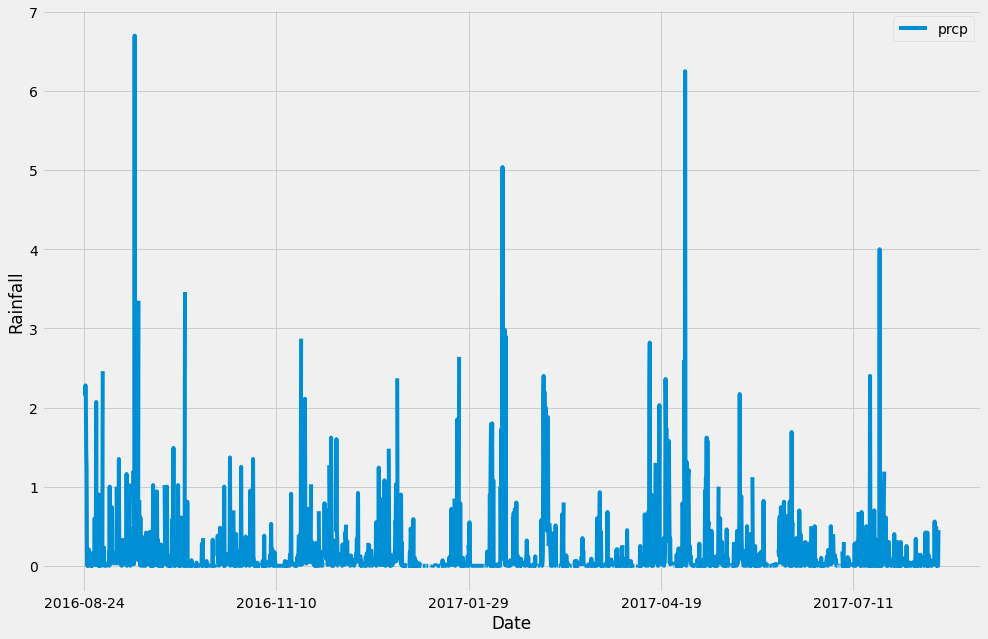

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

    
# Calculate the date one year from the last date in data set.
year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(rain_data).set_index("date")

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Rainfall")

In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.id).count()
stations

9

In [78]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
summary = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                        filter(measurement.station == "USC00519281").all()
print(f"The low, high, and average temperatures for the station are {summary} respectively.")

The low, high, and average temperatures for the station are [(54.0, 85.0, 71.66378066378067)] respectively.


Text(0, 0.5, 'Frequency')

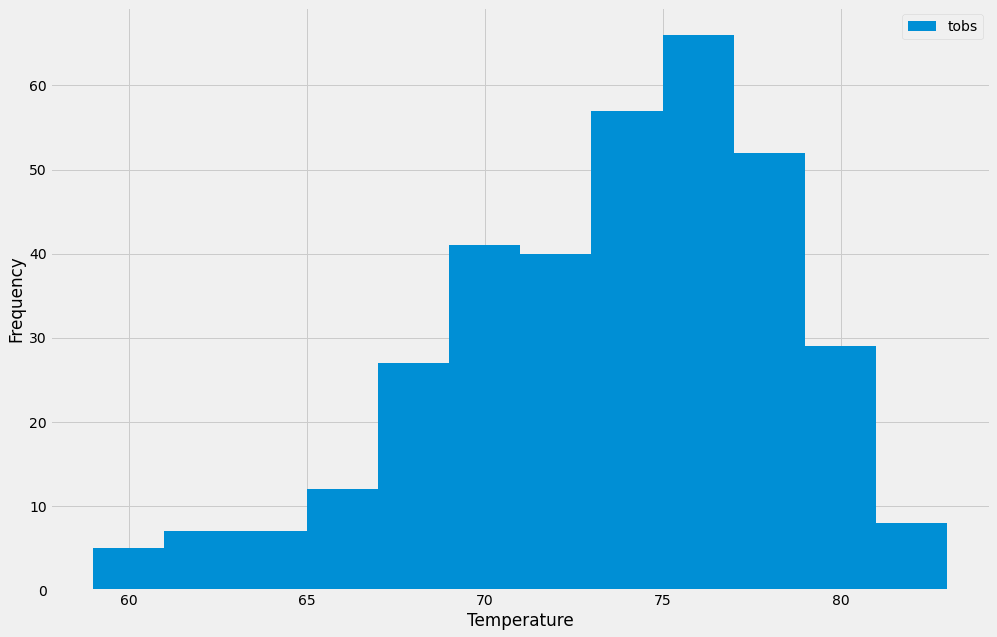

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).filter(measurement.date>year).filter(measurement.station=="USC00519281").all()
temps

df=pd.DataFrame(temps)

df.plot.hist(bins=12, figsize=(15,10))
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [83]:
# Close Session
session.close()